# COMP 4830 and 5500 Project 

## Instructions:
On this project, you can work alone or with one of your friends. Everyone needs to submit their project on ELEARN no matter it is done as a team or alone. In the report, write the names of all the students worked in this project. Put all files, source codes and your results in <span style="color:red">jupyter notebook file</span> and name it as LASTNAME_Project.ipynb  and submit it through eLearn. Any different form of submission will lose 10 points. Any kind of plagiarism is prohibited. Any late submission will lose 20 points.


Please enter your name:  **Shourav Bin Rabbani**<br>
Your team members name:  **Samia Jabeen**<br>

## Project Description
The palmerpenguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

The dataset consists of 7 columns.

species: penguin species (Chinstrap, Adélie, or Gentoo)<br>
bill_length_mm: bill length (mm)<br>
bill_depth_mm: bill depth (mm)<br>
flipper_length_mm: flipper length (mm)<br>
body_mass_g: body mass (g)<br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)<br>
sex: penguin sex<br>


## Part 1 Preparing the Data (G-15 Points, UG- 25 Points)

Clear the data by removing all the missing data features <br>
Drop 'rowid', 'island', 'sex', 'year' <br>
Reset the index <br>
Create another data frame for pca which has only the 'bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g' <br> 
Draw a sublpot which shows all the 2D plots of the combinations of the various features (It will be a 2x3 and will show all the combinations of features such as bill_length_mm vs bill_depth_mm or bill_depth_mm vs body_mass_g <br>

Your Code:

In [31]:
%matplotlib inline
#include all the modules here
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [32]:
# load in the dataset into a pandas dataframe and show the size of the file and show the first 5 rows of the data
originaldata = pd.read_csv(r'penguins.csv')
print(originaldata.shape)
originaldata.head()

# Drop Missing Values
df = originaldata.dropna()
print(df.shape)
df.head()

subsetdf = df.drop(['rowid', 'island', 'sex', 'year'], axis=1)
print(subsetdf.shape)
subsetdf.head()

subsetdf = subsetdf.reset_index(drop=True)
subsetdf.head()

pcadf = subsetdf[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
print(pcadf.shape)
pcadf.head()

(344, 9)
(316, 9)
(316, 5)
(316, 4)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


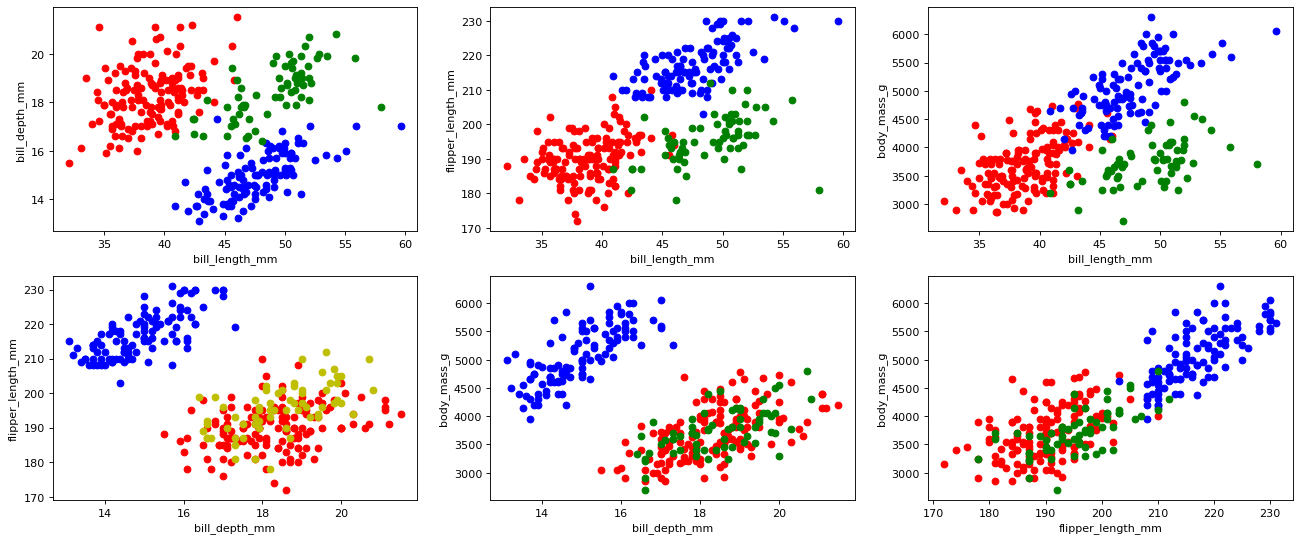

In [33]:
plt.figure(figsize=(20, 8), dpi=80)
plt.subplot(2,3,1)

plt.scatter(subsetdf[subsetdf.species=="Adelie"].bill_length_mm, subsetdf[subsetdf.species=="Adelie"].bill_depth_mm,color='r')
plt.scatter(subsetdf[subsetdf.species=="Gentoo"].bill_length_mm, subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm,color='b')
plt.scatter(subsetdf[subsetdf.species=="Chinstrap"].bill_length_mm, subsetdf[subsetdf.species=="Chinstrap"].bill_depth_mm,color='g')
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')

plt.subplot(2,3,2)
plt.scatter(subsetdf[subsetdf.species=="Adelie"].bill_length_mm, subsetdf[subsetdf.species=="Adelie"].flipper_length_mm,color='r')
plt.scatter(subsetdf[subsetdf.species=="Gentoo"].bill_length_mm, subsetdf[subsetdf.species=="Gentoo"].flipper_length_mm,color='b')
plt.scatter(subsetdf[subsetdf.species=="Chinstrap"].bill_length_mm, subsetdf[subsetdf.species=="Chinstrap"].flipper_length_mm,color='g')
plt.xlabel('bill_length_mm')
plt.ylabel('flipper_length_mm')

plt.subplot(2,3,3)
plt.scatter(subsetdf[subsetdf.species=="Adelie"].bill_length_mm, subsetdf[subsetdf.species=="Adelie"].body_mass_g,color='r')
plt.scatter(subsetdf[subsetdf.species=="Gentoo"].bill_length_mm, subsetdf[subsetdf.species=="Gentoo"].body_mass_g,color='b')
plt.scatter(subsetdf[subsetdf.species=="Chinstrap"].bill_length_mm, subsetdf[subsetdf.species=="Chinstrap"].body_mass_g,color='g')
plt.xlabel('bill_length_mm')
plt.ylabel('body_mass_g')

plt.subplot(2,3,4)
plt.scatter(subsetdf[subsetdf.species=="Adelie"].bill_depth_mm, subsetdf[subsetdf.species=="Adelie"].flipper_length_mm,color='r')
plt.scatter(subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm, subsetdf[subsetdf.species=="Gentoo"].flipper_length_mm,color='b')
plt.scatter(subsetdf[subsetdf.species=="Chinstrap"].bill_depth_mm, subsetdf[subsetdf.species=="Chinstrap"].flipper_length_mm,color='y')
plt.xlabel('bill_depth_mm')
plt.ylabel('flipper_length_mm')

plt.subplot(2,3,5)
plt.scatter(subsetdf[subsetdf.species=="Adelie"].bill_depth_mm, subsetdf[subsetdf.species=="Adelie"].body_mass_g,color='r')
plt.scatter(subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm, subsetdf[subsetdf.species=="Gentoo"].body_mass_g,color='b')
plt.scatter(subsetdf[subsetdf.species=="Chinstrap"].bill_depth_mm, subsetdf[subsetdf.species=="Chinstrap"].body_mass_g,color='g')
plt.xlabel('bill_depth_mm')
plt.ylabel('body_mass_g')

plt.subplot(2,3,6)
plt.scatter(subsetdf[subsetdf.species=="Adelie"].flipper_length_mm, subsetdf[subsetdf.species=="Adelie"].body_mass_g,color='r')
plt.scatter(subsetdf[subsetdf.species=="Gentoo"].flipper_length_mm, subsetdf[subsetdf.species=="Gentoo"].body_mass_g,color='b')
plt.scatter(subsetdf[subsetdf.species=="Chinstrap"].flipper_length_mm, subsetdf[subsetdf.species=="Chinstrap"].body_mass_g,color='g')
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g');


#### Discuss which of the two features are good to be used to classify between ALL SPECIES by only looking at the graphs? 


Your Answer: 

Scatter plots of **bill_length** and **bill_depth** (first row, first column) give us separable scatter plots and so they are good features to use for classificaton. Similarly, **fipper_length** and **body_mass** are also good features for classification. 

## Part 2 PCA  (G-15 Points,UG-25 Points)
Assume that you need to do the dimension reduction for the classification mentioned in Part 1 <br>
Find and figure out how many principal components are needed to satisfy the variation rule of 95% <br>
Draw a 2-D and 3-D graphs using the best principal components (choose best 2 principal components for 2D and choose best 3 for the 3D plots)  <br>
Your code:

In [34]:
pca_scaler = preprocessing.StandardScaler()
scaled_data = pca_scaler.fit_transform(pcadf)

pca = PCA()
pca_data = pca.fit_transform(scaled_data)

print(pca.explained_variance_ratio_)

[0.68500056 0.19584774 0.09134208 0.02780963]


To satisfy the 95% rule, we will need 3 principal components, which explains up to 97.2% variance.  So, two principal components for 2d plots will explain up to 88.1% varianace.

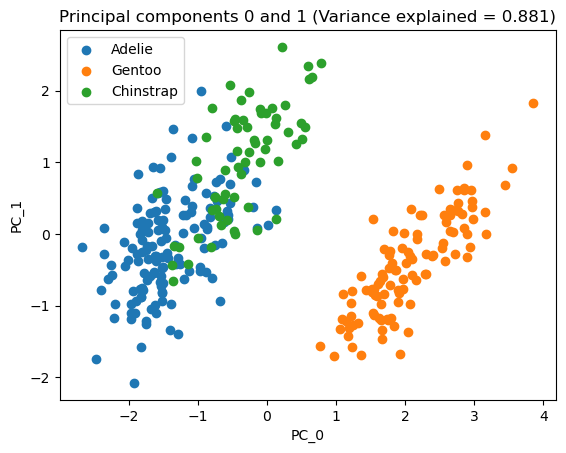

In [35]:
def plot_pca(x_idx, y_idx):
    plt.subplots()
    for i, label in enumerate(subsetdf.species.unique()):
        idx = (subsetdf.species == label)
        plt.scatter(pca_data[idx, x_idx], pca_data[idx, y_idx], label=label, c=f"C{i}")

    plt.xlabel(f'PC_{x_idx}')
    plt.ylabel(f'PC_{y_idx}')
    plt.legend()
    var_explained = pca.explained_variance_ratio_[x_idx] + pca.explained_variance_ratio_[y_idx]
    plt.title(f'Principal components {x_idx} and {y_idx} (Variance explained = {var_explained:.3f})');


plot_pca(0,1)
# plot_pca(0,2)
# plot_pca(1,2)



3D plot using Top 3 principal components

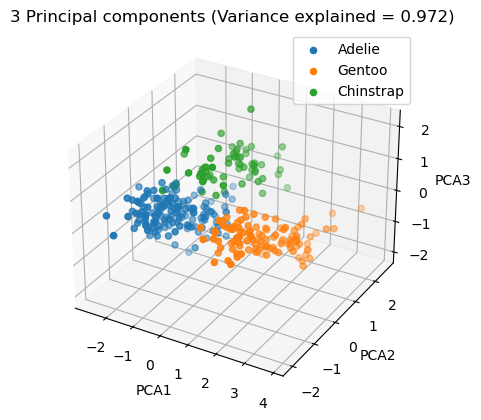

In [36]:
ax = plt.figure().add_subplot(projection='3d')

for i, label in enumerate(subsetdf.species.unique()):
    idx = (subsetdf.species == label)
    ax.scatter(pca_data[idx, 0], pca_data[idx, 1], pca_data[idx, 2], label=label, c=f"C{i}")

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend()
ax.set_title(f'3 Principal components (Variance explained = {pca.explained_variance_ratio_.cumsum()[2]:.3f})');


#### Discuss your results? In terms of classification, compare the results from pca vs part 1 subplots? Does PCA helps us to classify better or not? Explain it. 

Your Answer:

PCA works by combining all features and projects them in axes where most variation is present and so gives high quality features. That is why it is better to use PCA features than just the two raw features for classifications

## Part 3 Kmeans  (G-15 Points,UG-25 Points)
Apply Kmeans to the PCA Data and plot the results <br>
Your code:

In [37]:
# pca_data

In [38]:
kmeans = KMeans(n_clusters = 3, random_state=0)
kmeans.fit(pca_data)

KMeans(n_clusters=3, random_state=0)

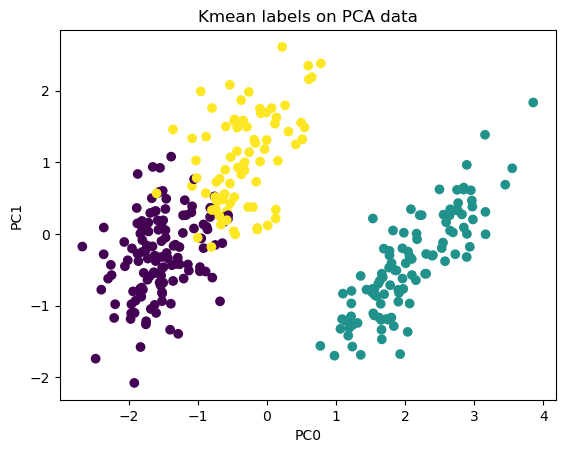

In [39]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans.labels_)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('Kmean labels on PCA data');

To understand how well kMeans worked, we do the following:
1. get the cluster labels (which are not same as species, e.g. cluster label of 0 might mean any species) and set that as a new column in subsetdf
2. pivot the dataframe with cluster label as columns and true labels (species) as index and count occurences. 
3. We use the highest occurence to map cluster label to actual species label
4. create a confusion matrix to check results
5. compute the accuracy score

In [40]:
subsetdf['kmeans_labels'] = kmeans.labels_ #store kmeans labels {0,1,2} in the dataframe

subsetdf['dummy_col'] = 1 

# find the species name by find the max labels counts
max_labels = subsetdf.pivot_table(index='species', columns='kmeans_labels', values='dummy_col', aggfunc='count', fill_value=0).idxmax()

max_labels

kmeans_labels
0       Adelie
1       Gentoo
2    Chinstrap
dtype: object

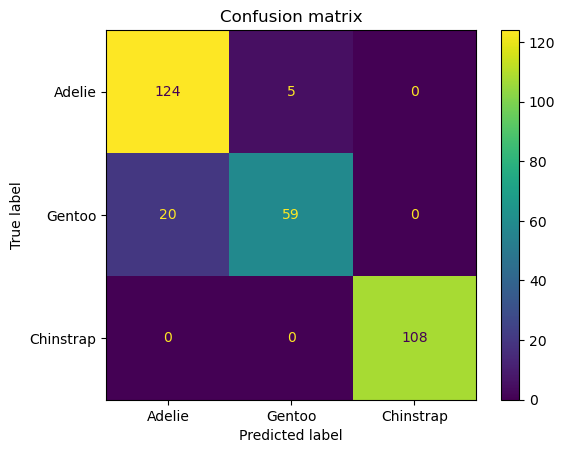

In [41]:
subsetdf['y_pred'] = subsetdf.kmeans_labels.map(max_labels.to_dict()) # add the species labels from kmeans to dataframe

confusion = confusion_matrix(subsetdf['y_pred'], subsetdf['species']) #compute confusion matrix

ConfusionMatrixDisplay(confusion, display_labels=subsetdf.species.unique()).plot();
plt.title('Confusion matrix');

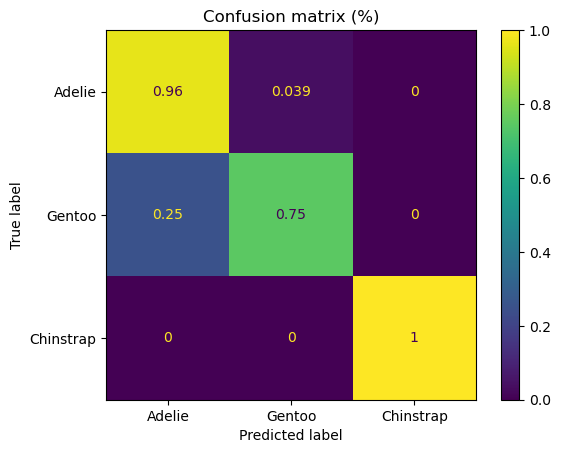

In [42]:
# row normalize confusion matrix (show % instead of)
ConfusionMatrixDisplay(
    confusion / confusion.sum(axis=1)[:, np.newaxis],
    display_labels=subsetdf.species.unique()).plot();
plt.title('Confusion matrix (%)');

In [43]:
print("Overall kmeans accuracy is:", accuracy_score(subsetdf['y_pred'], subsetdf['species']))

Overall kmeans accuracy is: 0.9208860759493671


#### Discuss your results? Are you able to seperate all the species correctly with Kmeans? 

Your Answer:

Overall kmeans on PCA has 92.1% accuracy. The kmeans classifier has no problem identifying **Chinstrap**. But there is some confusion with **Adelie** (True positive rate = 96%) and **Gentoo** (True positive rate = 75%). Possible reason for this is because there is some overlap between *Gentoo* and *Adelie* samples as we saw before in the scatter plots.

## Part 4 Neural Network  (G-15 Points,UG-25 Points)
Use neural network based classifier to find the members of each spicies using the best principal components from part 2. <br>
#### Discuss your results? Are you able to seperate all the species correctly with Neural Networks?  <br>
Your Code:

In [44]:
nn = MLPClassifier(random_state=0)

nn_X = pca_data[:, 0:3] #selecting first 3 PC which satisfy the 95% rule
print('X shape', nn_X.shape)

nn_y_true = subsetdf.species

X_train, X_test, y_train, y_test = train_test_split(nn_X, nn_y_true, test_size=0.2, random_state=0)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)

print('Test score = ', accuracy_score(y_pred, y_test))

X shape (316, 3)
Test score =  0.984375


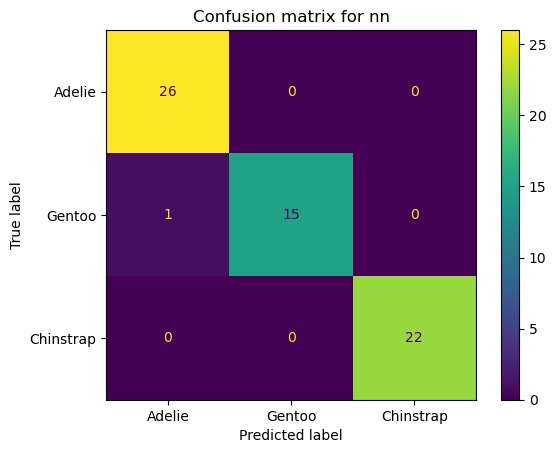

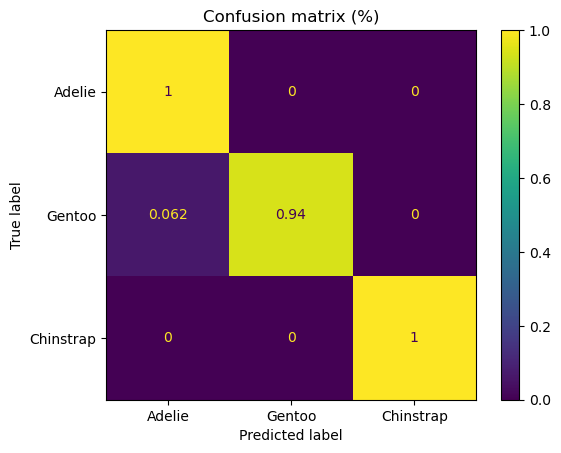

In [45]:
nn_confusion = confusion_matrix(y_pred, y_test)
row_sum = nn_confusion.sum(axis=1)

nn_confusion_percentage = nn_confusion / row_sum[:, np.newaxis]
ConfusionMatrixDisplay(nn_confusion, display_labels=subsetdf.species.unique()).plot();
plt.title('Confusion matrix for nn')

ConfusionMatrixDisplay(nn_confusion_percentage, display_labels=subsetdf.species.unique()).plot();
plt.title('Confusion matrix (%)');

The Neural network (MLPClassifier) was able to classify much better than KMeans. For example, it has less confusion for **Gentoo** (True positive rate = 94%) and no confusion with **Adelie**.

## Part 5 Graduate Student (G-40 Points, Bonus for UG max 20 Points)

This time we will not use the 'species' feature but will use the 'sex' feature for the classification. From the features bill length_mm, bill_depth_mm, flipper_length_mm,  body_mass_g, you will determine whether the penguin is male or female. 
You will develop Logistic Regression, Decision Tree and Neural Networks to classify using 'sex' feature. Split your data 80/20 way(80% of the data for training and 20% for testing). Compare the accuracies of these classification methods and discuss the results. Draw a table(See the sample code below) <br>
Table example:

In [46]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('X and y shapes', X.shape, y.shape)
print('Train rows', X_train.shape[0])
print('Test rows', X_test.shape[0])

X and y shapes (316, 4) (316,)
Train rows 252
Test rows 64


In [47]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [48]:
cols = ['model', 'train_score', 'test_score']
rows = []

models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'DecisionTree ': DecisionTreeClassifier(random_state=0),
    'Neural Network (MLP)': MLPClassifier(random_state=0),
}

for name, model in models.items():
    scaled_X_train = scaler.transform(X_train)

    model.fit(scaled_X_train, y_train)

    y_pred_train = model.predict(scaled_X_train)
    train_score = accuracy_score(y_pred_train, y_train)

    scaled_X_test = scaler.transform(X_test)
    y_pred = model.predict(scaled_X_test)
    test_score = accuracy_score(y_pred, y_test)

    rows.append([name, train_score, test_score])


In [49]:
results = pd.DataFrame(rows, columns=cols).set_index('model').sort_values('test_score', ascending=0)

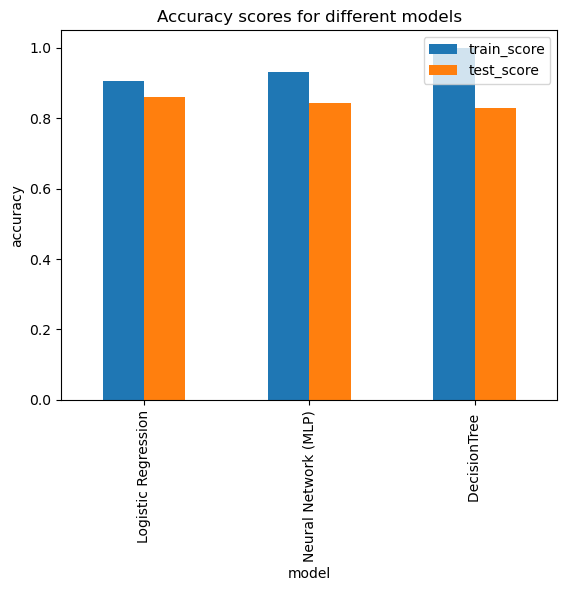

In [50]:
results.plot.bar(ylabel='accuracy', title="Accuracy scores for different models");

In [51]:
results

,train_score,test_score
model,,
Logistic Regression,0.904762,0.859375
Neural Network (MLP),0.932540,0.843750
DecisionTree,1.000000,0.828125


The best model here based on test score (without playing with hyperparameters) is Logistic Regression followed by Neural Network (MLP) and Decision Tree. We observe that there is some overfitting since the training score is higher than test score especially in Decision Tree.